In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

# import decision tree model from scikit-learn
from sklearn import tree

# import metrics to use cross-validation
from sklearn import metrics

%matplotlib inline

In [2]:
'''Import dataset
The link to the dataset can be found here:
https://archive.ics.uci.edu/ml/datasets/wine+quality'''

df = pd.read_csv("winequality-red.csv", sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# size of the dataset
df.shape

(1599, 12)

In [5]:
# Any empty value?
df.isnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# quality of wine is graded from 0 to 10 but this dataset hase only 6 grades.
# so we can classify them from 0 to 5
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
# We need a dictionary to map 0-5 into unique values of quality grades.
quality_dic = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

In [9]:
# Lets change quality grades according to our dictionary
df['quality'] = df.quality.map(quality_dic)

In [10]:
# Now we see that quality is graded from 0-5
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [11]:
# Split dataset into test and training, 1000 rows for training and 599 for testing
# 1- shuffle dataset
df = df.sample(frac = 1).reset_index(drop=True)

# Lets check to make sure it is shuffled
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.0,0.20,0.48,2.00,0.343,6.0,18.0,0.99790,3.30,0.71,10.5,2
1,7.8,0.55,0.35,2.20,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,2
2,9.8,0.66,0.39,3.20,0.083,21.0,59.0,0.99890,3.37,0.71,11.5,4
3,6.1,0.58,0.23,2.50,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,3
4,11.9,0.40,0.65,2.15,0.068,7.0,27.0,0.99880,3.06,0.68,11.3,3


In [12]:
df_train = df.head(1000)
df_test = df.tail(599)

We train the model using decision tree 

In [13]:
# Initialize the decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth = 3)

In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
x_train = df_train.iloc[:, :-1]
y_train = df_train['quality']

x_test = df_test.iloc[:, :-1]
y_test = df_test['quality']

In [16]:
# Fit the model using all 11 features of the dataset
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
# Prediction on training and test datasets
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

In [18]:
# Accuracy of our predictions on training dataset:
train_accuracy = metrics.accuracy_score(y_train, train_predict)
train_accuracy

0.57

In [19]:
# Accuracy of our test predictions on testing dataset:
test_accuracy = metrics.accuracy_score(y_test, test_predict)
test_accuracy

0.5459098497495827

Change Max depth to see what happens for the train and test accuracies

In [20]:
train_accuracy, test_accuracy= [], []
for i in range(1, 25):
    
    # Initialize the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth = i)
    
    # Fit the model using all 11 features of the dataset
    clf.fit(x_train, y_train)
    
    # Prediction on training and test datasets
    train_predict = clf.predict(x_train)
    test_predict = clf.predict(x_test)
    
    # Accuracy of our predictions on training dataset:
    train_accuracy.append(metrics.accuracy_score(y_train, train_predict))
    
    # Accuracy of our test predictions on testing dataset:
    test_accuracy.append(metrics.accuracy_score(y_test, test_predict))

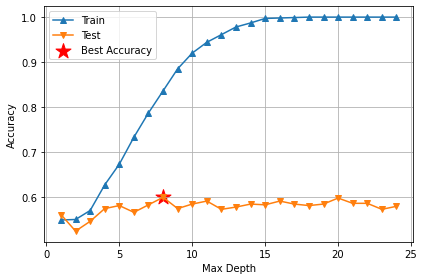

In [21]:
plt.figure(figsize = (6, 4) )
plt.plot(range(1, 25), train_accuracy, marker = '^', label = 'Train')
plt.plot(range(1, 25), test_accuracy, marker = 'v', label = 'Test')
plt.scatter(np.argmax(test_accuracy)+1, max(test_accuracy), s = 250, marker = '*', color = 'r', label = 'Best Accuracy')
plt.legend()
plt.grid(which = 'both')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('Red_Wine_Accuracy_vs_Max_depth_Decision_Tree.png', dpi = 300)

## Most popular cross validation techniques
### k-fold cross-validation
### stratified k-fold cross-validation
### hold-out based validation
### leave-one-out cross-validation
### group k-fold cross-validation

Perform k-fold cross-validation

In [23]:
# Import model selection module from scikit-learn 
from sklearn import model_selection

 # we create a new column called kfold and fill it with -1
df_train['kfold'] = -1

# Randomize the rows of the data
df_train = df_train.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
k = 0
for fold, (trn_, val_) in enumerate(kf.split(X=df_train)):
    df_train.loc[val_, 'kfold'] = fold

    # save the new csv with kfold column 
df_train.to_csv('train_fold.csv', index=False)

In [25]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.0,0.975,0.04,2.0,0.087,12.0,67.0,0.99565,3.35,0.60,9.4,1,0
1,7.5,0.410,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,2,0
2,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.6,2,0
3,6.4,0.400,0.23,1.6,0.066,5.0,12.0,0.99580,3.34,0.56,9.2,2,0
4,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,3,0


In [31]:
x_train = df_train[df_train['kfold'] != 0].iloc[:, :-2]
df_train[df_train['kfold'] != k]['quality']

200    4
201    4
202    3
203    3
204    2
      ..
995    3
996    2
997    2
998    2
999    2
Name: quality, Length: 800, dtype: int64

In [36]:
train_accuracy_ave, val_accuracy_ave= [], []
for i in range(1, 25):
    train_accuracy, val_accuracy= [], []
    
    for k in range(5):
        x_train = df_train[df_train['kfold'] != k].iloc[:, :-2]
        y_train = df_train[df_train['kfold'] != k]['quality']

        x_validation = df_train[df_train['kfold'] == k].iloc[:, :-2]
        y_validation = df_train[df_train['kfold'] == k]['quality']
        
        # Initialize the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth = i)

        # Fit the model using all 11 features of the dataset
        clf.fit(x_train, y_train)

        # Prediction on training and test datasets
        train_predict = clf.predict(x_train)
        validation_predict = clf.predict(x_validation)

        # Accuracy of our predictions on training dataset:
        train_accuracy.append(metrics.accuracy_score(y_train, train_predict))

        # Accuracy of our validation predictions on testing dataset:
        val_accuracy.append(metrics.accuracy_score(y_validation, validation_predict))
    train_accuracy_ave.append(np.mean(train_accuracy))
    val_accuracy_ave.append(np.mean(val_accuracy))

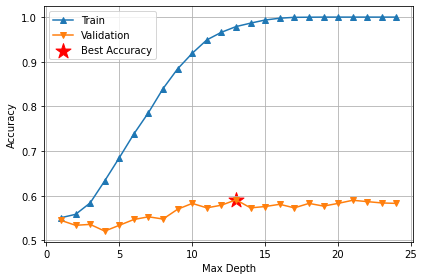

In [38]:
plt.figure(figsize = (6, 4) )
plt.plot(range(1, 25), train_accuracy_ave, marker = '^', label = 'Train')
plt.plot(range(1, 25), val_accuracy_ave, marker = 'v', label = 'Validation')
plt.scatter(np.argmax(val_accuracy_ave)+1, max(val_accuracy_ave), s = 250, marker = '*', color = 'r', label = 'Best Accuracy')
plt.legend()
plt.grid(which = 'both')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig('Red_Wine_Accuracy_vs_Max_depth_Decision_Tree_5_fold_validation.png', dpi = 300)

In [41]:
# Optimum Max Depth based on 5-fold cross validation is  
print('Optimum Max Depth is: {}'.format(np.argmax(val_accuracy_ave)+1))

Optimum Max Depth is: 13


In [ ]:
# Now we train the model using max depth of 13:
